## Drive Hesabına Erişim

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/TDDİY'

/content/drive/.shortcut-targets-by-id/18TnDAyZYuScf8Jlx-5YfmnreW4TxwRwf/TDDİY


## Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import os
import re

## Verinin yüklenmesi

In [ ]:
insultSet = pd.read_csv('teknofest_train_final.csv', sep="|")

In [ ]:
insultSet = pd.read_csv("process_data_.csv")

In [ ]:
insultSet.head()

,Unnamed: 0,id,text,is_offensive,target,remove_mentions,remove_links,remove_punctuation,remove_emojis,remove_stopwords,remove_numbers,correct_chars,remove_non_tr,remove_2_ch,remove_tags,lower_ch,strip_spaces,find_lemmas
0,0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli
1,1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST,Bu adamın islama ve müslümanlara verdiği zarar...,Bu adamın islama ve müslümanlara verdiği zarar...,Bu adamın islama ve müslümanlara verdiği zarar...,Bu adamın islama ve müslümanlara verdiği zarar...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,adamın islama müslümanlara verdiği zararı Gavu...,adamın islama müslümanlara verdiği zararı Gavu...,adamın islama müslümanlara verdiği zararı gavu...,adamın islama müslümanlara verdiği zararı gavu...,adam islam müslüman ver zarar gavur bile yap
2,2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkek zora gel
3,3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmaz göt kazık sok tıkırtı nere gel de
4,4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,otomasyon< sistemlerine= doğrudan bağlanabilir,otomasyon< sistemlerine= doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistem doğrudan bağla


## Veriseti İncelemeleri

In [ ]:
insultSet.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [ ]:
insultSet.isna().sum()

Unnamed: 0         0
id                 0
text               0
is_offensive       0
target             0
remove_mentions    0
remove_links       0
remove_emojis      0
remove_tags        0
find_lemmas        0
dtype: int64

### Veriseti İçeriğinin Görselleştirilmesi

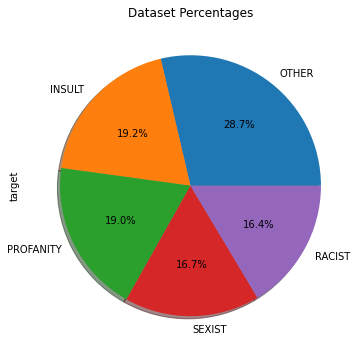

In [ ]:
insultSet["target"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title("Dataset Percentages")
plt.show()

## Veri Önişleme

In [ ]:
!pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import string
import gensim.parsing.preprocessing as gsp
import re
from typing import List
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java
ZEMBEREK_PATH = '/content/drive/MyDrive/TDDİY/zemberek-full.jar'

In [ ]:
# noktalama işaretlerinin kaldırılması
def remove_punctuation(data):
    data_no_punctuation = [ch for ch in str(data) if ch not in string.punctuation]
    data_no_punctuation = "".join(data_no_punctuation)

    return data_no_punctuation

import nltk
nltk.download('punkt')

# durak kelimelerin kaldırılması
def remove_stopwords(text): 
    stop_words = ['çok', 'at', 'in', 'im', 'acaba','acep','allah','adamakıllı','adeta','ait','altmýþ','altmış','altý'
                  , 'altı','ama','amma','anca','ancak','arada','artýk','aslında','aynen','ayrıca','az','açıkça','açıkçası',
                  'bana','bari','bazen','bazý','bazı','başkası','baţka','belki','ben','benden','beni','benim',
                  'beri','beriki','beþ','beş','beţ','bilcümle','bile','bin','binaen','binaenaleyh','bir','biraz',
                  'birazdan','birbiri','birden','birdenbire','biri','birice','birileri','birisi','birkaç',
                  'birkaçı','birkez','birlikte','birçok','birçoğu','birþey','birþeyi','birşey','birşeyi','birţey',
                  'bitevi','biteviye','bittabi','biz','bizatihi','bizce','bizcileyin','bizden','bize','bizi','bizim',
                  'bizimki','bizzat','boşuna','bu','buna','bunda','bundan','bunlar','bunları','bunların','bunu','bunun',
                  'buracıkta','burada','buradan','burası','böyle','böylece','böylecene','böylelikle','böylemesine',
                  'böylesine','büsbütün','bütün','cuk','cümlesi','da','daha','dahi','dahil','dahilen','daima','dair',
                  'dayanarak','de','defa','dek','demin','demincek','deminden','denli','derakap','derhal','derken',
                  'deđil','değil','değin','diye','diđer','diğer','diğeri','doksan','dokuz','dolayı','dolayısıyla',
                  'doğru','dört','edecek','eden','ederek','edilecek','ediliyor','edilmesi','ediyor','elbet',
                  'elbette','elli','emme','en','enikonu','epey','epeyce','epeyi','esasen','esnasında','etmesi',
                  'etraflı','etraflıca','etti','ettiği','ettiğini','evleviyetle','evvel','evvela','evvelce',
                  'evvelden','evvelemirde','evveli','eđer','eğer','fakat','filanca','gah','gayet','gayetle','gayri',
                  'gayrı','gelgelelim','gene','gerek','gerçi','geçende','geçenlerde','gibi','gibilerden','gibisinden',
                  'gine','göre','gırla','hakeza','halbuki','halen','halihazırda','haliyle','handiyse','hangi','hangisi',
                  'hani','hariç','hasebiyle','hasılı','hatta','hele','hem','henüz','hep','hepsi','her',
                  'herhangi','herkes','herkesin','hiç','hiçbir','hiçbiri','hoş','hulasaten','iken','iki',
                  'ila','ile','ilen','ilgili','ilk','illa','illaki','imdi','indinde','inen','insermi','ise',
                  'ister','itibaren','itibariyle','itibarıyla','iyi','iyice','iyicene','için','iş','işte',
                  'iţte','kadar','kaffesi','kah','kala','kanýmca','karşın','katrilyon','kaynak','kaçı','kelli',
                  'kendi','kendilerine','kendini','kendisi','kendisine','kendisini','kere','kez','keza','kezalik',
                  'keşke','keţke','ki','kim','kimden','kime','kimi','kimisi','kimse','kimsecik','kimsecikler',
                  'külliyen','kýrk','kýsaca','kırk','kısaca','lakin','leh','lütfen','maada','madem','mademki',
                  'mamafih','mebni','međer','meğer','meğerki','meğerse','milyar','milyon','mu','mü','mý','mı',
                  'nasýl','nasıl','nasılsa','nazaran','naşi','ne','neden','nedeniyle','nedenle','nedense',
                  'nerde','nerden','nerdeyse','nere','nerede','nereden','neredeyse','neresi','nereye',
                  'netekim','neye','neyi','neyse','nice','nihayet','nihayetinde','nitekim','niye','niçin',
                  'o','olan','olarak','oldu','olduklarını','oldukça','olduğu','olduğunu','olmadı',
                  'olmadığı','olmak','olması','olmayan','olmaz','olsa','olsun','olup','olur','olursa','oluyor',
                  'on','ona','onca','onculayın','onda','ondan','onlar','onlardan','onlari','onlarýn','onları',
                  'onların','onu','onun','oracık','oracıkta','orada','oradan','oranca','oranla','oraya','otuz',
                  'oysa','oysaki','pek','pekala','peki','pekçe','peyderpey','rağmen','sadece','sahi','sahiden',
                  'sana','sanki','sekiz','seksen','sen','senden','seni','senin','siz','sizden','sizi','sizin',
                  'sonra','sonradan','sonraları','sonunda','tabii','tam','tamam','tamamen','tamamıyla','tarafından',
                  'tek','trilyon','tüm','var','vardı','vasıtasıyla','ve','velev','velhasıl','velhasılıkelam','veya',
                  'veyahut','ya','yahut','yakinen','yakında','yakından','yakınlarda','yalnız','yalnızca','yani',
                  'yapacak','yapmak','yaptı','yaptıkları','yaptığı','yaptığını','yapılan','yapılması','yapıyor',
                  'yedi','yeniden','yenilerde','yerine','yetmiþ','yetmiş','yetmiţ','yine','yirmi','yok','yoksa',
                  'yoluyla','yüz','yüzünden','zarfında','zaten','zati','zira','çabuk','çabukça','çeşitli',
                  'çok','çokları','çoklarınca','çokluk','çoklukla','çokça','çoğu','çoğun','çoğunca','çoğunlukla',
                  'çünkü','öbür','öbürkü','öbürü','önce','önceden','önceleri','öncelikle','öteki','ötekisi','öyle',
                  'öylece','öylelikle','öylemesine','öz','üzere','üç','þey','þeyden','þeyi','þeyler','þu','þuna',
                  'þunda','þundan','þunu','şayet','şey','şeyden','şeyi','şeyler','şu','şuna','şuncacık','şunda',
                  'şundan','şunlar','şunları','şunu','şunun','şura','şuracık','şuracıkta','şurası','şöyle',
                  'ţayet','ţimdi','ţu','ţöyle', 'hala', 'yer', 'güzel', 'büyük']
    stop_words = ['a','acaba','altı','altmış','ama','ancak','arada','artık','asla','aslında','aslında','ayrıca',
                  'az','bana','bazen','bazı','bazıları','belki','ben','benden','beni','benim','beri','beş',
                  'bile','bilhassa','bin','bir','biraz','birçoğu','birçok','biri','birisi','birkaç','birşey',
                  'biz','bizden','bize','bizi','bizim','böyle','böylece','bu','buna','bunda','bundan','bunlar',
                  'bunları','bunların','bunu','bunun','burada','bütün','çoğu','çoğunu','çok','çünkü','da',
                  'daha','dahi','dan','de','defa','değil','diğer','diğeri','diğerleri','diye','doksan','dokuz',
                  'dolayı','dolayısıyla','dört','e','edecek','eden','ederek','edilecek','ediliyor','edilmesi',
                  'ediyor','eğer','elbette','elli','en','etmesi','etti','ettiği','ettiğini','fakat','falan',
                  'filan','gene','gereği','gerek','gibi','göre','hala','halde','halen','hangi','hangisi',
                  'hani','hatta','hem','henüz','hep','hepsi','her','herhangi','herkes','herkese','herkesi',
                  'herkesin','hiç','hiçbir','hiçbiri','i','ı','için','içinde','iki','ile','ilgili','ise',
                  'işte','itibaren','itibariyle','kaç','kadar','karşın','kendi','kendilerine','kendine',
                  'kendini','kendisi','kendisine','kendisini','kez','ki','kim','kime','kimi','kimin',
                  'kimisi','kimse','kırk','madem','mi','mı','milyar','milyon','mu','mü','nasıl','ne',
                  'neden','nedenle','nerde','nerede','nereye','neyse','niçin','nin','nın','niye','nun',
                  'nün','o','öbür','olan','olarak','oldu','olduğu','olduğunu','olduklarını','olmadı',
                  'olmadığı','olmak','olması','olmayan','olmaz','olsa','olsun','olup','olur','olur','olursa',
                  'oluyor','on','ön','ona','önce','ondan','onlar','onlara','onlardan','onları','onların',
                  'onu','onun','orada','öte','ötürü','otuz','öyle','oysa','pek','rağmen','sana','sanki',
                  'sanki','şayet','şekilde','sekiz','seksen','sen','senden','seni','senin','şey','şeyden',
                  'şeye','şeyi','şeyler','şimdi','siz','siz','sizden','sizden','size','sizi','sizi',
                  'sizin','sizin','sonra','şöyle','şu','şuna','şunları','şunu','ta','tabii','tam',
                  'tamam','tamamen','tarafından','trilyon','tüm','tümü','u','ü','üç','un','ün','üzere',
                  'var','vardı','ve','veya','ya','yani','yapacak','yapılan','yapılması','yapıyor','yapmak',
                  'yaptı','yaptığı','yaptığını','yaptıkları','ye','yedi','yerine','yetmiş','yi','yı','yine',
                  'yirmi','yoksa','yu','yüz','zaten','zira','zxtest']
    
    stop_words = ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'bir', 'birkaç', 'birşey', 'biz',
                  'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'den', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem',
                  'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü',
                  'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey',
                  'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'dan']
    word_tokens = nltk.word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)

# Bazı Türkçe olmayan harflerin türkçe karşılıklarına çevrilmesi
def correct_old_characters(self):
    self = re.sub(r"Â", "A", self)
    self = re.sub(r"Î", "I", self)
    self = re.sub(r"î", "ı", self)
    self = re.sub(r"â", "a", self)
    self = re.sub(r"û", "u", self)
    self = re.sub(r"Û", "U", self)
    return self

# İki karakterden küçük kelimelerin kaldırılması
def remove_two_ch_words(data):
  text = ' '.join([w for w in data.split() if len(w)>2])
  return text

# Kelimelerin küçük harfe çevrilmesi
def lower(self):
    self = re.sub(r"İ", "i", self)
    self = re.sub(r"I", "ı", self)
    self = re.sub(r"Ç", "ç", self)
    self = re.sub(r"Ş", "ş", self)
    self = re.sub(r"Ü", "ü", self)
    self = re.sub(r"Ğ", "ğ", self)
    self = self.lower() # for the rest use default lower
    return self

# Kelimelerin lemmalarının bulunması
startJVM(jvmpath=getDefaultJVMPath(), classpath= ZEMBEREK_PATH, convertStrings=False, interrupt=True)
def tokenizasyon(text):
    return word_tokenize(text)
    
def lemmatizer(text):
    lemma_words = []
    global counter
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
      lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
      lemma_words.append(lemma_word)
    
    text = ' '.join(lemma_words)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
insultSet['remove_punctuation'] = insultSet['text'].apply(remove_punctuation)
insultSet['remove_stopwords'] = insultSet['remove_punctuation'].apply(remove_stopwords)
regex_for_numbers = r'([0-9]+)'
insultSet['remove_numbers'] = insultSet['remove_stopwords'].str.replace(regex_for_numbers, ' ', case=False, regex=True)
insultSet['correct_chars'] = insultSet['remove_numbers'].apply(lambda x: correct_old_characters(x))

whitelist = set('abcçdefgğhıijklmnoöpqrsştuüvwxyz ABCÇDEFGĞHIİJKLMNOÖPQRSŞTUÜVWXYZ')

insultSet['remove_non_tr'] = insultSet['correct_chars'].apply(lambda x: ''.join(filter(whitelist.__contains__, x)))
insultSet['remove_2_ch'] = insultSet['remove_non_tr'].apply(remove_two_ch_words)
insultSet['lower_ch'] = insultSet['remove_2_ch'].apply(lambda x: lower(x))
insultSet['strip_spaces'] = insultSet['lower_ch'].apply(gsp.strip_multiple_whitespaces)
insultSet['find_lemmas'] = insultSet['strip_spaces'].apply(lemmatizer)
insultSet.dropna(axis=0, inplace=True)

In [ ]:
insultSet.head()

,id,text,is_offensive,target,remove_punctuation,remove_stopwords,remove_numbers,correct_chars,remove_non_tr,remove_2_ch,lower_ch,strip_spaces,find_lemmas
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli,çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST,Bu adamın islama ve müslümanlara verdiği zarar...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,Bu adamın islama müslümanlara verdiği zararı G...,adamın islama müslümanlara verdiği zararı Gavu...,adamın islama müslümanlara verdiği zararı gavu...,adamın islama müslümanlara verdiği zararı gavu...,adam islam müslüman ver zarar gavur bile yap
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkekler zora gelmez,erkek zora gel
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,Utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,utanmaz göt kazık sok tıkırtı nere gel de
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistem doğrudan bağla


# Makine Öğrenmesi Yöntemleri

## Öznitelik Çıkarımı - Metin Verilerinin Vektörlere Dönüştürülmesi

### BoW (Bag of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(insultSet['find_lemmas'].values.astype('U'))

bow.shape

(12617, 6194)

### TF-IDF (Term Frequency — Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=6000, ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(insultSet['find_lemmas'].values.astype('U'))

tfidf.shape

(12617, 6000)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

xtrain_bow, xtest_bow, ytrain_bow, ytest_bow = train_test_split(bow, insultSet['target'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

xtrain_tfidf, xtest_tfidf, ytrain_tfidf, ytest_tfidf = train_test_split(tfidf, insultSet['target'], test_size=0.2, random_state=42)

## Lojistic Regression

### BoW Vektörleri ile 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=300).fit(xtrain_bow, ytrain_bow)

print(lr.score(xtest_bow, ytest_bow)) 

pred = lr.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

0.8498415213946118
              precision    recall  f1-score   support

      INSULT       0.75      0.84      0.79       477
       OTHER       0.83      0.86      0.84       758
   PROFANITY       0.92      0.85      0.89       451
      RACIST       0.90      0.81      0.86       419
      SEXIST       0.89      0.89      0.89       419

    accuracy                           0.85      2524
   macro avg       0.86      0.85      0.85      2524
weighted avg       0.85      0.85      0.85      2524


Confusion Matrix: 
 [[399  50  14   7   7]
 [ 52 650   8  21  27]
 [ 43  14 385   3   6]
 [ 22  44   9 340   4]
 [ 15  25   3   5 371]]
Accuracy: 
 0.8498415213946118


### TF-IDF Vektörleri ile 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=300).fit(xtrain_tfidf, ytrain_tfidf)

print(lr.score(xtest_tfidf, ytest_tfidf))

pred = lr.predict(xtest_tfidf)
print(classification_report(ytest_tfidf, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_tfidf, pred))
print("Accuracy: \n", accuracy_score(ytest_tfidf, pred))

0.8288431061806656
              precision    recall  f1-score   support

      INSULT       0.75      0.73      0.74       477
       OTHER       0.76      0.89      0.82       758
   PROFANITY       0.91      0.87      0.89       451
      RACIST       0.91      0.77      0.83       419
      SEXIST       0.91      0.85      0.88       419

    accuracy                           0.83      2524
   macro avg       0.85      0.82      0.83      2524
weighted avg       0.84      0.83      0.83      2524


Confusion Matrix: 
 [[350  97  18   7   5]
 [ 42 671   7  17  21]
 [ 31  21 391   3   5]
 [ 26  58   8 322   5]
 [ 20  31   5   5 358]]
Accuracy: 
 0.8288431061806656


## Multinomial Naive Bayes

### BoW Vektörleri ile 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain_bow, ytrain_bow)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.79      0.75      0.77       477
       OTHER       0.88      0.77      0.82       758
   PROFANITY       0.79      0.93      0.86       451
      RACIST       0.84      0.84      0.84       419
      SEXIST       0.81      0.90      0.85       419

    accuracy                           0.83      2524
   macro avg       0.82      0.84      0.83      2524
weighted avg       0.83      0.83      0.83      2524


Confusion Matrix: 
 [[356  34  51  14  22]
 [ 56 580  32  39  51]
 [ 15   5 420   5   6]
 [ 12  26  19 352  10]
 [  9  15   9   7 379]]
Accuracy: 
 0.8268621236133122


### TF-IDF Vektörleri ile

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain_bow, ytrain_bow)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.79      0.75      0.77       477
       OTHER       0.88      0.77      0.82       758
   PROFANITY       0.79      0.93      0.86       451
      RACIST       0.84      0.84      0.84       419
      SEXIST       0.81      0.90      0.85       419

    accuracy                           0.83      2524
   macro avg       0.82      0.84      0.83      2524
weighted avg       0.83      0.83      0.83      2524


Confusion Matrix: 
 [[356  34  51  14  22]
 [ 56 580  32  39  51]
 [ 15   5 420   5   6]
 [ 12  26  19 352  10]
 [  9  15   9   7 379]]
Accuracy: 
 0.8268621236133122


## Support Vektor Machines

### BoW Vektrleri ile

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(xtrain_bow, ytrain_bow)

pred = clf.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.63      0.80      0.70       477
       OTHER       0.73      0.80      0.76       758
   PROFANITY       0.91      0.74      0.82       451
      RACIST       0.93      0.72      0.81       419
      SEXIST       0.85      0.80      0.83       419

    accuracy                           0.78      2524
   macro avg       0.81      0.77      0.78      2524
weighted avg       0.80      0.78      0.78      2524


Confusion Matrix: 
 [[381  58  17   5  16]
 [108 605   7  13  25]
 [ 56  46 334   4  11]
 [ 33  75   3 303   5]
 [ 31  47   5   1 335]]
Accuracy: 
 0.7757527733755943


### TF-IDF Vektörleri ile

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(xtrain_tfidf, ytrain_tfidf)

pred = clf.predict(xtest_tfidf)
print(classification_report(ytest_tfidf, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_tfidf, pred))
print("Accuracy: \n", accuracy_score(ytest_tfidf, pred))

              precision    recall  f1-score   support

      INSULT       0.64      0.62      0.63       477
       OTHER       0.60      0.89      0.72       758
   PROFANITY       0.85      0.64      0.73       451
      RACIST       0.86      0.59      0.70       419
      SEXIST       0.86      0.62      0.72       419

    accuracy                           0.70      2524
   macro avg       0.76      0.67      0.70      2524
weighted avg       0.74      0.70      0.70      2524


Confusion Matrix: 
 [[298 126  24  12  17]
 [ 48 678   8  10  14]
 [ 49 104 287   6   5]
 [ 42 111  10 249   7]
 [ 31 110   7  12 259]]
Accuracy: 
 0.7016640253565769


## Decision Trees

### BoW Yöntemi ile 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier(random_state=0)
clfDT.fit(xtrain_bow, ytrain_bow)

pred = clfDT.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.63      0.63      0.63       477
       OTHER       0.74      0.76      0.75       758
   PROFANITY       0.82      0.87      0.84       451
      RACIST       0.83      0.74      0.78       419
      SEXIST       0.82      0.83      0.82       419

    accuracy                           0.76      2524
   macro avg       0.77      0.76      0.77      2524
weighted avg       0.76      0.76      0.76      2524


Confusion Matrix: 
 [[301 108  38  13  17]
 [ 80 576  22  34  46]
 [ 41  13 391   4   2]
 [ 33  48  19 308  11]
 [ 25  31   6  10 347]]
Accuracy: 
 0.7618858954041204


### TF-IDF Yöntemi ile 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier(random_state=0)
clfDT.fit(xtrain_tfidf, ytrain_tfidf)

pred = clfDT.predict(xtest_tfidf)
print(classification_report(ytest_tfidf, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_tfidf, pred))
print("Accuracy: \n", accuracy_score(ytest_tfidf, pred))

              precision    recall  f1-score   support

      INSULT       0.55      0.68      0.61       477
       OTHER       0.77      0.68      0.72       758
   PROFANITY       0.83      0.85      0.84       451
      RACIST       0.85      0.75      0.80       419
      SEXIST       0.84      0.85      0.85       419

    accuracy                           0.75      2524
   macro avg       0.77      0.76      0.76      2524
weighted avg       0.76      0.75      0.76      2524


Confusion Matrix: 
 [[325  80  42  19  11]
 [161 518  15  25  39]
 [ 47  10 384   5   5]
 [ 36  41  13 316  13]
 [ 21  27   6   7 358]]
Accuracy: 
 0.7531695721077655


## K-NN

### BoW Vektörleri ile

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(xtrain_bow, ytrain_bow)

pred = neigh.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.44      0.73      0.55       477
       OTHER       0.78      0.39      0.52       758
   PROFANITY       0.71      0.85      0.78       451
      RACIST       0.68      0.56      0.61       419
      SEXIST       0.72      0.82      0.77       419

    accuracy                           0.63      2524
   macro avg       0.67      0.67      0.64      2524
weighted avg       0.68      0.63      0.63      2524


Confusion Matrix: 
 [[346  37  48  21  25]
 [250 293  50  70  95]
 [ 48   5 385   9   4]
 [101  32  40 233  13]
 [ 39   8  19   8 345]]
Accuracy: 
 0.6347068145800316


### TF-IDF Yöntemi ile

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(xtrain_tfidf, ytrain_tfidf)

pred = neigh.predict(xtest_tfidf)
print(classification_report(ytest_tfidf, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_tfidf, pred))
print("Accuracy: \n", accuracy_score(ytest_tfidf, pred))

              precision    recall  f1-score   support

      INSULT       0.31      0.90      0.46       477
       OTHER       0.92      0.39      0.55       758
   PROFANITY       0.73      0.76      0.74       451
      RACIST       0.81      0.28      0.42       419
      SEXIST       0.92      0.45      0.61       419

    accuracy                           0.55      2524
   macro avg       0.74      0.56      0.56      2524
weighted avg       0.75      0.55      0.56      2524


Confusion Matrix: 
 [[430   2  32   7   6]
 [395 298  48  12   5]
 [103   2 341   3   2]
 [259  10  28 119   3]
 [193  11  19   6 190]]
Accuracy: 
 0.5459587955625991


## Random Forest

### BoW Yöntemi ile

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clsRF = RandomForestClassifier(max_depth=10, random_state=0)
clsRF.fit(xtrain_bow, ytrain_bow)

pred = clsRF.predict(xtest_bow)
print(classification_report(ytest_bow, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_bow, pred))
print("Accuracy: \n", accuracy_score(ytest_bow, pred))

              precision    recall  f1-score   support

      INSULT       0.81      0.10      0.18       477
       OTHER       0.39      0.98      0.56       758
   PROFANITY       0.95      0.66      0.78       451
      RACIST       0.98      0.13      0.24       419
      SEXIST       0.95      0.45      0.61       419

    accuracy                           0.53      2524
   macro avg       0.82      0.46      0.47      2524
weighted avg       0.76      0.53      0.48      2524


Confusion Matrix: 
 [[ 47 424   6   0   0]
 [  2 746   4   1   5]
 [  7 147 297   0   0]
 [  2 355   2  56   4]
 [  0 227   4   0 188]]
Accuracy: 
 0.528526148969889


### TF-IDF Yöntemi ile

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clsRF = RandomForestClassifier(max_depth=10, random_state=0)
clsRF.fit(xtrain_tfidf, ytrain_tfidf)

pred = clsRF.predict(xtest_tfidf)
print(classification_report(ytest_tfidf, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest_tfidf, pred))
print("Accuracy: \n", accuracy_score(ytest_tfidf, pred))

              precision    recall  f1-score   support

      INSULT       1.00      0.03      0.06       477
       OTHER       0.39      0.99      0.55       758
   PROFANITY       0.99      0.64      0.77       451
      RACIST       0.98      0.19      0.32       419
      SEXIST       0.93      0.43      0.59       419

    accuracy                           0.52      2524
   macro avg       0.86      0.46      0.46      2524
weighted avg       0.80      0.52      0.47      2524


Confusion Matrix: 
 [[ 15 460   2   0   0]
 [  0 749   1   2   6]
 [  0 163 287   0   1]
 [  0 332   1  80   6]
 [  0 238   0   0 181]]
Accuracy: 
 0.5198098256735341


# Deep Learning

## LSTM

### Tüm önişlemelerle eğitim

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.data_utils import pad_sequences

# insultSet = pd.read_csv('teknofest_train_final.csv', sep="|")
df = pd.read_csv("process_data_.csv")

# Stop-words'leri yükleyin
stop_words = set(stopwords.words('turkish'))
df.fillna("", inplace=True)
# Her metni tokenize edin ve stop-words'leri çıkarın
tokenized_texts = []
for text in df['find_lemmas'].values.astype('U'):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    tokenized_texts.append(filtered_tokens)

# Sözlük oluşturun ve her kelimeyi indekse dönüştürün
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index

# Her metni sayısal vektöre dönüştürün ve sabit bir uzunluğa ayarlayın
MAX_SEQUENCE_LENGTH = 10
sequences = tokenizer.texts_to_sequences(tokenized_texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

df.loc[:,'target'] = df.target.map({'OTHER': 0, 'INSULT': 1, "PROFANITY": 2, "SEXIST":3, "RACIST": 4})

# Etiketleri oluşturun ve 'categorical' formata dönüştürün
targets = to_categorical(df['target'].values)

# Eğitim ve test verilerinizi ayırın
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, targets, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# LSTM ağını tanımlayın
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Ağın özetini yazdırın
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 64)            64000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 10, 64)           0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 97,349
Trainable params: 97,349
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
316/316 [==============================] - 6s 12ms/step - loss: 1.0222 - accuracy: 0.5884 - val_loss: 0.5

In [ ]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8245


[0.5275495648384094, 0.8244849443435669]

### Lemma bulma adımı hariç tüm önişlemelerle eğitim

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.data_utils import pad_sequences

# insultSet = pd.read_csv('teknofest_train_final.csv', sep="|")
# insultSet = pd.read_csv("process_data_.csv")

# Stop-words'leri yükleyin
stop_words = set(stopwords.words('turkish'))
# insultSet.fillna("", inplace=True)
# Her metni tokenize edin ve stop-words'leri çıkarın
tokenized_texts = []
for text in insultSet['strip_spaces'].values.astype('U'):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    tokenized_texts.append(filtered_tokens)

# Sözlük oluşturun ve her kelimeyi indekse dönüştürün
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index

# Her metni sayısal vektöre dönüştürün ve sabit bir uzunluğa ayarlayın
MAX_SEQUENCE_LENGTH = 10
sequences = tokenizer.texts_to_sequences(tokenized_texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

insultSet.loc[:,'target'] = insultSet.target.map({'OTHER': 0, 'INSULT': 1, "PROFANITY": 2, "SEXIST":3, "RACIST": 4})

# Etiketleri oluşturun ve 'categorical' formata dönüştürün
targets = to_categorical(insultSet['target'].values)

# Eğitim ve test verilerinizi ayırın
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, targets, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# LSTM ağını tanımlayın
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(5, activation='softmax'))

# Ağın özetini yazdırın
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 97,349
Trainable params: 97,349
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
316/316 [==============================] - 17s 28ms/step - loss: 1.2797 - accuracy: 0.4695 - val_loss: 0.79

In [ ]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 3ms/step - loss: 0.7848 - accuracy: 0.7437


[0.7847791314125061, 0.7436608672142029]

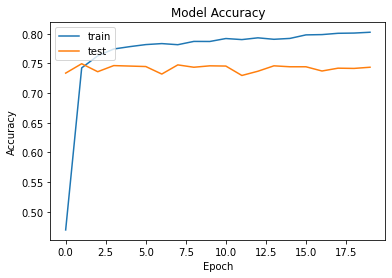

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


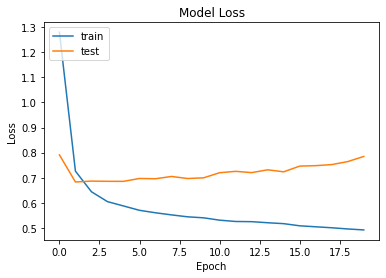

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Word2Vec

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
insultSet.loc[:,'target'] = insultSet.target.map({'OTHER': 0, 'INSULT': 1, "PROFANITY": 2, "SEXIST":3, "RACIST": 4})
xtrain, xtest, ytrain, ytest = train_test_split(insultSet["find_lemmas"], insultSet['target'], test_size=0.2, random_state=42)

In [ ]:
from gensim import models
from keras.preprocessing.text import Tokenizer

# Kelime vektörlerimizi elde etmek için Word2Vec modelimizi eğitelim
corpus = xtrain.apply(lambda x: x.split())
w2v_model = models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Kelime vektörlerimizi oluşturalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i > num_words:
        break
    if word in w2v_model.wv.index_to_key:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
from keras.utils.data_utils import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

# Veri setimizi işleyelim
X = tokenizer.texts_to_sequences(xtrain)
X = pad_sequences(X, maxlen=200, padding='post')
y = to_categorical(ytrain)

X_test = tokenizer.texts_to_sequences(xtest)
X_test = pad_sequences(X_test, maxlen=200, padding='post')
y_test = to_categorical(ytest)

# BiLSTM ağını oluşturalım
model = Sequential()
model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=200, trainable=False))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
312/312 [==============================] - 62s 184ms/step - loss: 1.5887 - accuracy: 0.2862 - val_loss: 1.5841 - val_accuracy: 0.2927
Epoch 2/20
312/312 [==============================] - 56s 180ms/step - loss: 1.5875 - accuracy: 0.2862 - val_loss: 1.5839 - val_accuracy: 0.2927
Epoch 3/20
312/312 [==============================] - 54s 174ms/step - loss: 1.5871 - accuracy: 0.2862 - val_loss: 1.5842 - val_accuracy: 0.2927
Epoch 4/20
312/312 [==============================] - 54s 174ms/step - loss: 1.5873 - accuracy: 0.2862 - val_loss: 1.5839 - val_accuracy: 0.2927
Epoch 5/20
312/312 [==============================] - 56s 180ms/step - loss: 1.5870 - accuracy: 0.2862 - val_loss: 1.5846 - val_accuracy: 0.2927
Epoch 6/20
312/312 [==============================] - 59s 190ms/step - loss: 1.5866 - accuracy: 0.2862 - val_loss: 1.5846 - val_accuracy: 0.2927
Epoch 7/20
312/312 [==============================] - 60s 193ms/step - loss: 1.5870 - accuracy: 0.2862 - val_loss: 1.5834 - val_ac

In [ ]:
test_X = tokenizer.texts_to_sequences(xtest)
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = to_categorical(ytest)

loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)

78/78 [==============================] - 4s 52ms/step - loss: 1.5835 - accuracy: 0.2927
Test accuracy: 0.29270249605178833


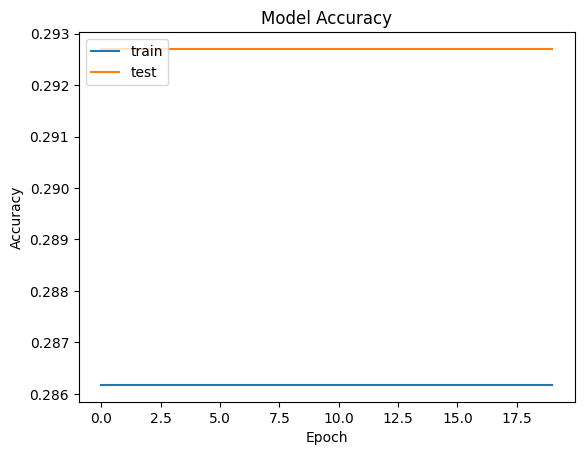

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


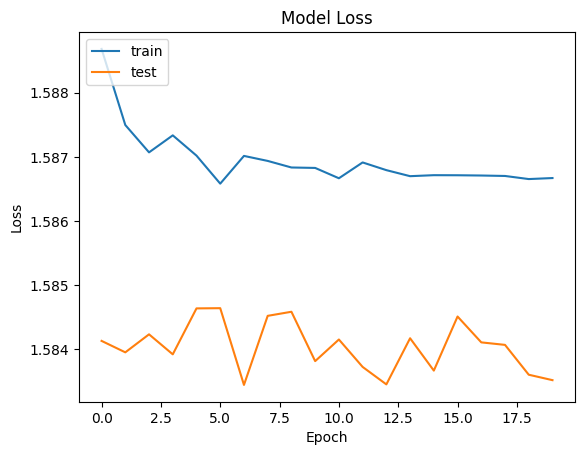

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### GloVe

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Tokenizer'ı ve GloVe vektörlerini yükleme
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain)
word_index = tokenizer.word_index

embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Veri setlerini dönüştürme
train_X = tokenizer.texts_to_sequences(xtrain)
train_X = pad_sequences(train_X, maxlen=200, padding='post')
train_y = ytrain.values
train_y = np.asarray(pd.get_dummies(train_y), dtype=np.float32)

test_X = tokenizer.texts_to_sequences(xtest)
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = ytest.values
test_y = np.asarray(pd.get_dummies(test_y), dtype=np.float32)

# Modeli tanımlama
input_layer = Input(shape=(200,))
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=False)(input_layer)

lstm_layer = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(512, activation='relu')(lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(5, activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=dense_layer_2)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_X, train_y, batch_size=64, epochs=100, validation_data=(test_X, test_y),
                    callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Modeli test etme
loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)


Epoch 1/100
156/156 [==============================] - 5s 16ms/step - loss: 1.5897 - accuracy: 0.2852 - val_loss: 1.5854 - val_accuracy: 0.2927
Epoch 2/100
156/156 [==============================] - 2s 12ms/step - loss: 1.5876 - accuracy: 0.2862 - val_loss: 1.5841 - val_accuracy: 0.2927
Epoch 3/100
156/156 [==============================] - 2s 15ms/step - loss: 1.5877 - accuracy: 0.2862 - val_loss: 1.5842 - val_accuracy: 0.2927
Epoch 4/100
156/156 [==============================] - 2s 13ms/step - loss: 1.5879 - accuracy: 0.2862 - val_loss: 1.5843 - val_accuracy: 0.2927
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 1.5839 - accuracy: 0.2927
Test accuracy: 0.29270249605178833


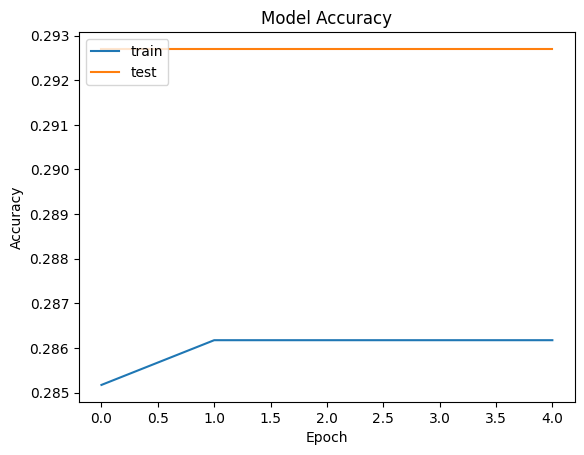

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


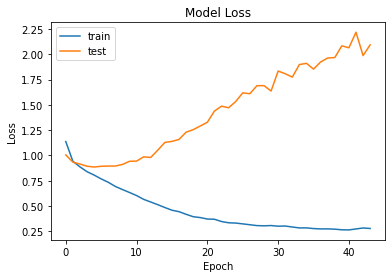

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Bi-LSTM

### Tüm önişlemelerle eğitim

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dropout, Conv1D,GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv("process_data_.csv")

# Metin verilerini Tokenize etme
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['find_lemmas'].values.astype('U'))
X = tokenizer.texts_to_sequences(df['find_lemmas'].values.astype('U'))
X = pad_sequences(X)

# Etiketleri One-hot encoding yapma
y = pd.get_dummies(df['target']).values

# Verileri eğitim ve test setleri olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bilstm ağı oluşturma
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'),)
model.add(Dense(5, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Modeli eğitme
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=10, 
    batch_size=64
)

# Test seti üzerinde model performansını değerlendirme
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 32)            64000     
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 25, 32)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                3216      
                                                                 
 dense_5 (Dense)             (None, 5)                

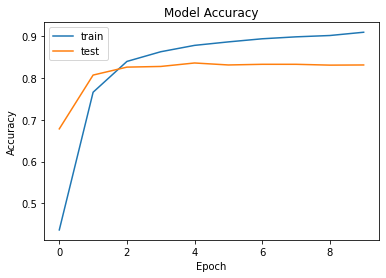

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


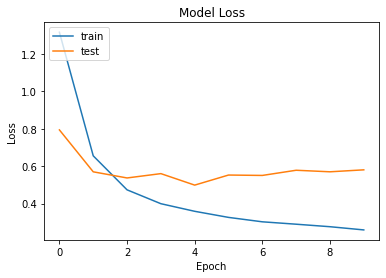

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Lemma bulma adımı hariç tüm önişlemelerle eğitim

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dropout, Conv1D,GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini yükleme
# CSV dosyasından veri kümesini yükleyin
# df1 = pd.read_csv("train.csv")
# df2 = pd.read_csv("test.csv")
# sentiSet = pd.concat([df1, df2])
# sentiSet.drop_duplicates(inplace=True)
# df = pd.read_csv("datawithoutstopwordswithlemmas.csv")

# df = pd.read_csv("process_data_.csv")

# Metin verilerini Tokenize etme
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(insultSet['strip_spaces'].values.astype('U'))
X = tokenizer.texts_to_sequences(insultSet['strip_spaces'].values.astype('U'))
X = pad_sequences(X)

# Etiketleri One-hot encoding yapma
y = pd.get_dummies(insultSet['target']).values

# Verileri eğitim ve test setleri olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bilstm ağı oluşturma
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'),)
model.add(Dense(5, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Modeli eğitme
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, 
    batch_size=64
)

# Test seti üzerinde model performansını değerlendirme
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 32)            64000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 15, 32)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                3216      
                                                                 
 dense_2 (Dense)             (None, 5)                

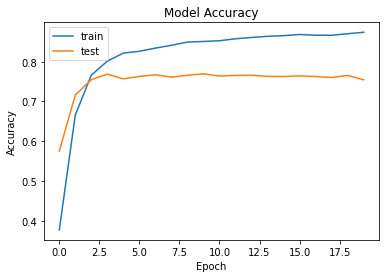

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


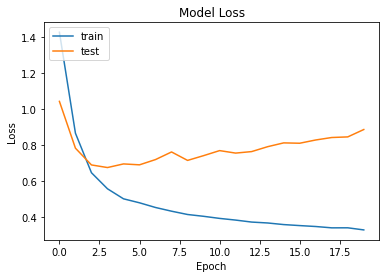

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Word2Vec

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
insultSet.loc[:,'target'] = insultSet.target.map({'OTHER': 0, 'INSULT': 1, "PROFANITY": 2, "SEXIST":3, "RACIST": 4})
xtrain, xtest, ytrain, ytest = train_test_split(insultSet["find_lemmas"], insultSet['target'], test_size=0.2, random_state=42)

In [ ]:
# Kelime vektörlerimizi elde etmek için Word2Vec modelimizi eğitelim
corpus = xtrain.apply(lambda x: x.split())
w2v_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Kelime vektörlerimizi oluşturalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i > num_words:
        break
    if word in w2v_model.wv.index_to_key:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# Veri setimizi işleyelim
X = tokenizer.texts_to_sequences(xtrain)
X = pad_sequences(X, maxlen=200, padding='post')
y = to_categorical(ytrain)

X_test = tokenizer.texts_to_sequences(xtest)
X_test = pad_sequences(X_test, maxlen=200, padding='post')
y_test = to_categorical(ytest)

# BiLSTM ağını oluşturalım
model = Sequential()
model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=200, trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
312/312 [==============================] - 18s 34ms/step - loss: 1.4778 - accuracy: 0.3512 - val_loss: 1.4782 - val_accuracy: 0.3516
Epoch 2/100
312/312 [==============================] - 11s 36ms/step - loss: 1.4303 - accuracy: 0.3868 - val_loss: 1.4428 - val_accuracy: 0.3966
Epoch 3/100
312/312 [==============================] - 9s 30ms/step - loss: 1.3834 - accuracy: 0.4252 - val_loss: 1.3716 - val_accuracy: 0.4286
Epoch 4/100
312/312 [==============================] - 8s 27ms/step - loss: 1.2552 - accuracy: 0.4846 - val_loss: 1.3332 - val_accuracy: 0.4463
Epoch 5/100
312/312 [==============================] - 9s 30ms/step - loss: 1.1853 - accuracy: 0.5104 - val_loss: 1.1545 - val_accuracy: 0.5124
Epoch 6/100
312/312 [==============================] - 9s 28ms/step - loss: 1.1372 - accuracy: 0.5288 - val_loss: 1.1816 - val_accuracy: 0.5176
Epoch 7/100
312/312 [==============================] - 9s 28ms/step - loss: 1.0991 - accuracy: 0.5454 - val_loss: 1.0646 - val_accurac

In [ ]:
test_X = tokenizer.texts_to_sequences(xtest)
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = to_categorical(ytest)

loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)

78/78 [==============================] - 1s 17ms/step - loss: 1.3425 - accuracy: 0.6347
Test accuracy: 0.6347233653068542


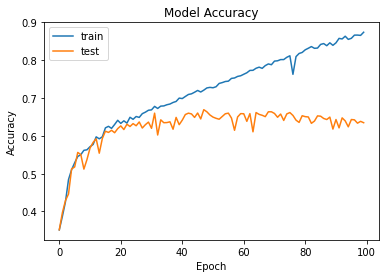

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


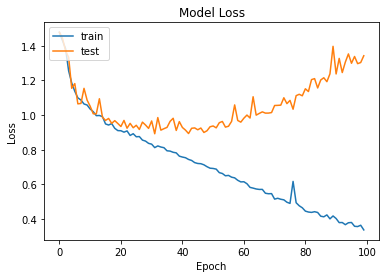

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### GloVe

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Tokenizer'ı ve GloVe vektörlerini yükleme
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain)
word_index = tokenizer.word_index

embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Veri setlerini dönüştürme
train_X = tokenizer.texts_to_sequences(xtrain)
train_X = pad_sequences(train_X, maxlen=200, padding='post')
train_y = ytrain.values
train_y = np.asarray(pd.get_dummies(train_y), dtype=np.float32)

test_X = tokenizer.texts_to_sequences(xtest)
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = ytest.values
test_y = np.asarray(pd.get_dummies(test_y), dtype=np.float32)

# Modeli tanımlama
input_layer = Input(shape=(200,))
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=False)(input_layer)

lstm_layer = Bidirectional(LSTM(128))(embedding_layer)
dense_layer_1 = Dense(512, activation='relu')(lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(5, activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=dense_layer_2)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_X, train_y, batch_size=64, epochs=100, validation_data=(test_X, test_y),
                    callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Modeli test etme
loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)


Epoch 1/100
156/156 [==============================] - 8s 27ms/step - loss: 1.1365 - accuracy: 0.5461 - val_loss: 1.0046 - val_accuracy: 0.6026
Epoch 2/100
156/156 [==============================] - 4s 23ms/step - loss: 0.9419 - accuracy: 0.6354 - val_loss: 0.9334 - val_accuracy: 0.6331
Epoch 3/100
156/156 [==============================] - 4s 29ms/step - loss: 0.8864 - accuracy: 0.6551 - val_loss: 0.9146 - val_accuracy: 0.6484
Epoch 4/100
156/156 [==============================] - 3s 21ms/step - loss: 0.8390 - accuracy: 0.6744 - val_loss: 0.8930 - val_accuracy: 0.6552
Epoch 5/100
156/156 [==============================] - 4s 23ms/step - loss: 0.8054 - accuracy: 0.6848 - val_loss: 0.8851 - val_accuracy: 0.6588
Epoch 6/100
156/156 [==============================] - 4s 25ms/step - loss: 0.7676 - accuracy: 0.6956 - val_loss: 0.8925 - val_accuracy: 0.6648
Epoch 7/100
156/156 [==============================] - 5s 29ms/step - loss: 0.7341 - accuracy: 0.7110 - val_loss: 0.8944 - val_accuracy:

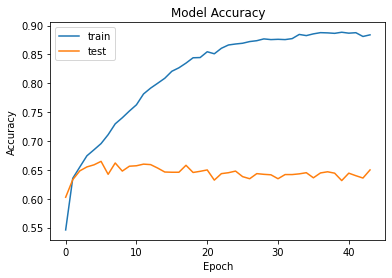

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


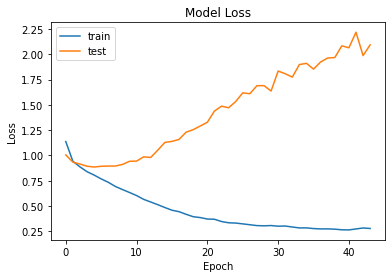

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##BERTurk

In [ ]:
!pip install transformers pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# df = pd.read_csv("process_data_.csv")
insultSet.loc[:,'target'] = insultSet.target.map({'OTHER': 0, 'INSULT': 1, "PROFANITY": 2, "SEXIST":3, "RACIST": 4})

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

xtrain, xtest, ytrain, ytest = train_test_split(insultSet["find_lemmas"], insultSet['target'], test_size=0.2, random_state=42)

In [ ]:
xtrain

2108                       çok konuşma götünü sikerim
5517                                iki kişi fazladan
4948                   böyle gerizekalısı zor bulunur
11472                       sana söylesem kızar mısın
4561     sana kuvvet uygulayan yerin cekimini sikiyim
                             ...                     
11964        kadar korkak olmayıp beni korusan olurdu
5191                    kadinlar surekli dir dir eder
5390                                       gay menisi
860               günes senin götüne koyarım doğarsan
7270            senin çekip çıkaranın çarkına sokayım
Name: strip_spaces, Length: 10093, dtype: object

In [ ]:
data = xtrain.values
labels = ytrain.values

In [ ]:
from transformers import AutoTokenizer
#Load BERT Turkish tokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased",do_lower_case=True, add_prefix_space=True, use_fast=False)

In [ ]:
insultSet.fillna("", inplace=True)

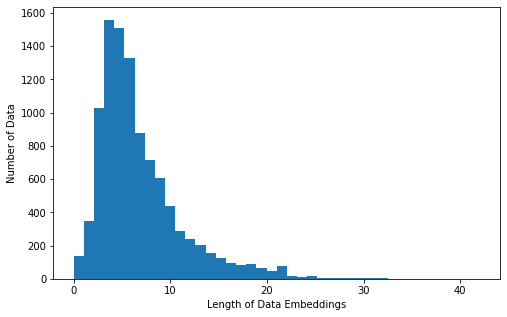

In [ ]:
import matplotlib.pyplot as plt
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Data Embeddings");
    ax.set_ylabel("Number of Data");
    return
plot_sentence_embeddings_length(data, tokenizer)

In [ ]:
indices=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids=indices["input_ids"]
attention_masks=indices["attention_mask"]
print(input_ids[0])
print(data[0])

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[2, 6568, 18158, 9153, 1023, 6002, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
çok konuş göt sik


In [ ]:
from sklearn.model_selection import train_test_split

# Use 99% for training and 1% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.2)

In [ ]:
import torch
if torch.cuda.is_available():  
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))
    
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

We will use the GPU: Tesla T4


In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels, dtype=torch.long)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.long)
validation_masks = torch.tensor(validation_masks, dtype=torch.long)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import AutoModelForSequenceClassification, AdamW, AutoConfig
config = AutoConfig.from_pretrained(
        "dbmdz/bert-base-turkish-cased",num_labels=5)
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = AutoModelForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-cased",config=config)

model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

### Tüm önişlemelerle eğitim

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  betas=[0.9,0.999],
                  eps = 1e-6 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 5

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 30 batches.
        if step % 30 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 5 ========
Training...
  Batch    30  of    631.    Elapsed: 0:00:14.
  Batch    60  of    631.    Elapsed: 0:00:24.
  Batch    90  of    631.    Elapsed: 0:00:34.
  Batch   120  of    631.    Elapsed: 0:00:45.
  Batch   150  of    631.    Elapsed: 0:00:56.
  Batch   180  of    631.    Elapsed: 0:01:07.
  Batch   210  of    631.    Elapsed: 0:01:18.
  Batch   240  of    631.    Elapsed: 0:01:29.
  Batch   270  of    631.    Elapsed: 0:01:39.
  Batch   300  of    631.    Elapsed: 0:01:50.
  Batch   330  of    631.    Elapsed: 0:02:01.
  Batch   360  of    631.    Elapsed: 0:02:11.
  Batch   390  of    631.    Elapsed: 0:02:22.
  Batch   420  of    631.    Elapsed: 0:02:33.
  Batch   450  of    631.    Elapsed: 0:02:43.
  Batch   480  of    631.    Elapsed: 0:02:54.
  Batch   510  of    631.    Elapsed: 0:03:05.
  Batch   540  of    631.    Elapsed: 0:03:16.
  Batch   570  of    631.    Elapsed: 0:03:26.
  Batch   600  of    631.    Elapsed: 0:03:37.
  Batch   630  of

In [ ]:
# Create sentence and label lists for test data
data = df.preprocessed_data.values
labels1 = df.Label.values

indices1=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(labels1)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('    DONE.')

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

### Lemma bulma adımı hariç tüm önişlemelerle eğitim

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  betas=[0.9,0.999],
                  eps = 1e-6 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 30 batches.
        if step % 30 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...
  Batch    30  of    505.    Elapsed: 0:00:11.
  Batch    60  of    505.    Elapsed: 0:00:21.
  Batch    90  of    505.    Elapsed: 0:00:32.
  Batch   120  of    505.    Elapsed: 0:00:42.
  Batch   150  of    505.    Elapsed: 0:00:53.
  Batch   180  of    505.    Elapsed: 0:01:04.
  Batch   210  of    505.    Elapsed: 0:01:15.
  Batch   240  of    505.    Elapsed: 0:01:26.
  Batch   270  of    505.    Elapsed: 0:01:36.
  Batch   300  of    505.    Elapsed: 0:01:47.
  Batch   330  of    505.    Elapsed: 0:01:58.
  Batch   360  of    505.    Elapsed: 0:02:08.
  Batch   390  of    505.    Elapsed: 0:02:19.
  Batch   420  of    505.    Elapsed: 0:02:30.
  Batch   450  of    505.    Elapsed: 0:02:41.
  Batch   480  of    505.    Elapsed: 0:02:51.

  Average training loss: 0.52
  Training epoch took: 0:03:00

Running Validation...
  Accuracy: 0.90
  Validation took: 0:00:16

======== Epoch 2 / 10 ========
Training...
  Batch    30  of    505.    El

In [ ]:
# Create sentence and label lists for test data
data = xtest.values
labels1 = ytest.values

indices1=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(labels1)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('    DONE.')

Predicting labels for 2,524 test sentences...
    DONE.


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))

Accuracy of BERT is: 0.9298732171156894


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       758
           1       0.89      0.88      0.88       477
           2       0.94      0.95      0.95       451
           3       0.90      0.98      0.94       419
           4       0.94      0.95      0.95       419

    accuracy                           0.93      2524
   macro avg       0.93      0.93      0.93      2524
weighted avg       0.93      0.93      0.93      2524



### Tahmin yapılacak modelin eğitilmesi

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  betas=[0.9,0.999],
                  eps = 1e-6 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 50

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42
epochs = 10

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracies = []
l2_regularization_coefficient = 0.01

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 30 batches.
        if step % 32 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.

        l2_regularization_term = torch.tensor(0., device=device)
        for param in model.cuda().parameters():
            l2_regularization_term += torch.norm(param)
        loss += l2_regularization_coefficient * l2_regularization_term
        
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.6f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
    accuracy = eval_accuracy/nb_eval_steps
    accuracies.append(accuracy)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.6f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")
torch.save(model.state_dict(), 'berturk_model.pth')


======== Epoch 1 / 10 ========
Training...
  Batch    32  of    631.    Elapsed: 0:00:07.
  Batch    64  of    631.    Elapsed: 0:00:14.
  Batch    96  of    631.    Elapsed: 0:00:20.
  Batch   128  of    631.    Elapsed: 0:00:27.
  Batch   160  of    631.    Elapsed: 0:00:33.
  Batch   192  of    631.    Elapsed: 0:00:40.
  Batch   224  of    631.    Elapsed: 0:00:47.
  Batch   256  of    631.    Elapsed: 0:00:53.
  Batch   288  of    631.    Elapsed: 0:01:00.
  Batch   320  of    631.    Elapsed: 0:01:09.
  Batch   352  of    631.    Elapsed: 0:01:17.
  Batch   384  of    631.    Elapsed: 0:01:25.
  Batch   416  of    631.    Elapsed: 0:01:33.
  Batch   448  of    631.    Elapsed: 0:01:41.
  Batch   480  of    631.    Elapsed: 0:01:48.
  Batch   512  of    631.    Elapsed: 0:01:57.
  Batch   544  of    631.    Elapsed: 0:02:03.
  Batch   576  of    631.    Elapsed: 0:02:10.
  Batch   608  of    631.    Elapsed: 0:02:17.

  Average training loss: 0.554330
  Training epoch took: 0:02:

In [ ]:
# Create sentence and label lists for test data
data = xtest.values.astype("U")
labels1 = ytest.values

indices1=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(labels1)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('    DONE.')

Predicting labels for 2,524 test sentences...
    DONE.


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))

Accuracy of BERT is: 0.9203645007923931


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       758
           1       0.84      0.91      0.87       477
           2       0.97      0.92      0.95       451
           3       0.94      0.97      0.96       419
           4       0.89      0.97      0.92       419

    accuracy                           0.92      2524
   macro avg       0.92      0.93      0.92      2524
weighted avg       0.92      0.92      0.92      2524

